In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-purchase-data/customer_purchase_data.csv


# Customer Purchase Prediction Using Machine Learning

This project focuses on predicting whether a customer will purchase a product or service
based on demographic and behavioral data using Logistic Regression (classification) algorithms.

## Objective

To build a basic classification model that predicts whether a customer will purchase a
product or service based on their demographic and behavioral data.

## Dataset Description

The dataset contains customer-related attributes such as:
- Age
- Gender
- Annual Income
- Number of Purchase
- Product Category
- Time spent on Website
- Loyalty Program
- Purchase Status
- Discount Avail

## Data Loading 

In this step, the dataset is loaded into the notebook using the pandas library.

In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/customer-purchase-data/customer_purchase_data.csv')
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


## Understanding the Customer Data


The dataset contains demographic and behavioral attributes of customers.
The target variable is PurchaseStatus, which indicates whether a customer
has purchased a product or not.


In [3]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


## Selecting Input Features and Output Variable


In [4]:
X = df.drop('PurchaseStatus', axis=1)
y = df['PurchaseStatus']


## Data Preprocessing


● Handle missing values (imputation or removal)                                           
● Encode categorical variables (Label Encoding / One-Hot Encoding)                        
● Scale numerical features using StandardScaler or MinMaxScaler                           
● Split data into training and testing sets

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Exploratory Data Analysis (EDA)

Missing values in dataset:
Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64


No missing values found!



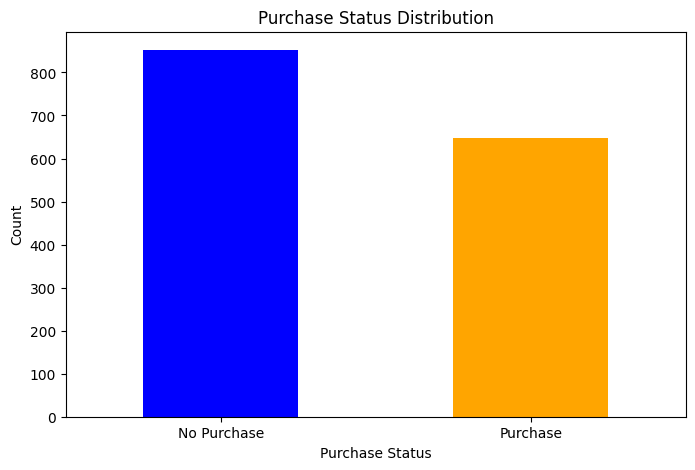

Purchase Status Distribution:
PurchaseStatus
0    852
1    648
Name: count, dtype: int64

Purchase Rate: 43.20%


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("Missing values in dataset:")
print(df.isnull().sum())
print("\n")

# Visualize missing values if any
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()
else:
    print("No missing values found!\n")

# Plot distribution of target variable
plt.figure(figsize=(8, 5))
df['PurchaseStatus'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Purchase Status Distribution')
plt.xlabel('Purchase Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Purchase', 'Purchase'], rotation=0)
plt.show()

print("Purchase Status Distribution:")
print(df['PurchaseStatus'].value_counts())
print(f"\nPurchase Rate: {(df['PurchaseStatus'].sum() / len(df)) * 100:.2f}%")

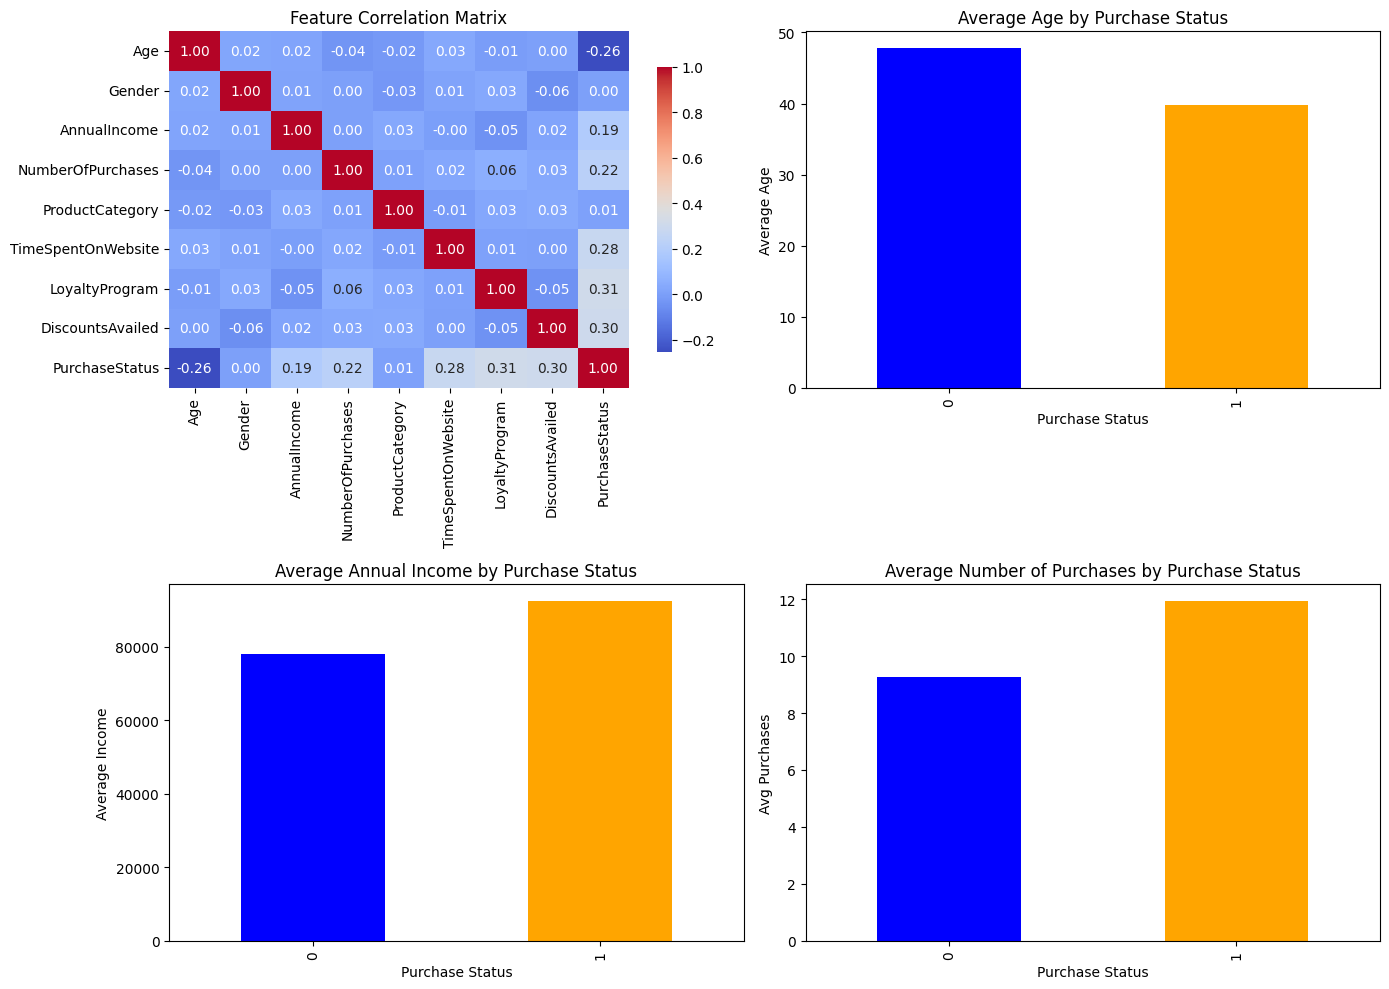


Key Statistics by Purchase Status:
                      Age  AnnualIncome  NumberOfPurchases
PurchaseStatus                                            
0               47.762911  78074.638282           9.276995
1               39.743827  92367.522671          11.922840


In [7]:
# Analyze feature correlations with target variable
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Correlation heatmap of all features
ax1 = axes[0, 0]
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=ax1, cbar_kws={'shrink': 0.8})
ax1.set_title('Feature Correlation Matrix')

# 2. Age vs Purchase Status
ax2 = axes[0, 1]
df.groupby('PurchaseStatus')['Age'].mean().plot(kind='bar', ax=ax2, color=['blue', 'orange'])
ax2.set_title('Average Age by Purchase Status')
ax2.set_xlabel('Purchase Status')
ax2.set_ylabel('Average Age')

# 3. Annual Income vs Purchase Status
ax3 = axes[1, 0]
df.groupby('PurchaseStatus')['AnnualIncome'].mean().plot(kind='bar', ax=ax3, color=['blue', 'orange'])
ax3.set_title('Average Annual Income by Purchase Status')
ax3.set_xlabel('Purchase Status')
ax3.set_ylabel('Average Income')

# 4. Number of Purchases vs Purchase Status
ax4 = axes[1, 1]
df.groupby('PurchaseStatus')['NumberOfPurchases'].mean().plot(kind='bar', ax=ax4, color=['blue', 'orange'])
ax4.set_title('Average Number of Purchases by Purchase Status')
ax4.set_xlabel('Purchase Status')
ax4.set_ylabel('Avg Purchases')

plt.tight_layout()
plt.show()

print("\nKey Statistics by Purchase Status:")
print(df.groupby('PurchaseStatus')[['Age', 'AnnualIncome', 'NumberOfPurchases']].mean())

## Model Building and Training

We will build two classification models:
- **Logistic Regression**: A linear classification model
- **Decision Tree**: A tree-based classification model

LOGISTIC REGRESSION MODEL

Logistic Regression - Training Accuracy: 0.8158
Logistic Regression - Testing Accuracy: 0.8367
Precision: 0.8762
Recall: 0.7188
F1-Score: 0.7897

Confusion Matrix (Logistic Regression):
[[159  13]
 [ 36  92]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       172
           1       0.88      0.72      0.79       128

    accuracy                           0.84       300
   macro avg       0.85      0.82      0.83       300
weighted avg       0.84      0.84      0.83       300



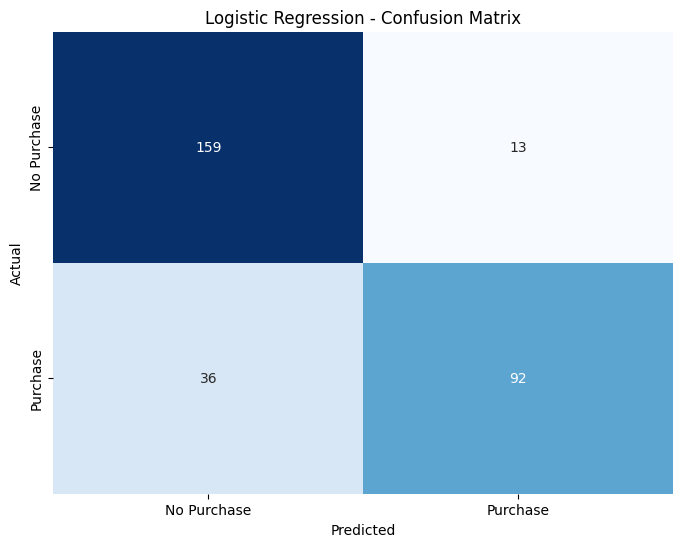

In [8]:
# Import necessary libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

# 1. Logistic Regression Model
print("="*60)
print("LOGISTIC REGRESSION MODEL")
print("="*60)

# Initialize and train logistic regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
lr_y_pred_train = lr_model.predict(X_train)
lr_y_pred_test = lr_model.predict(X_test)

# Calculate evaluation metrics
lr_train_accuracy = accuracy_score(y_train, lr_y_pred_train)
lr_test_accuracy = accuracy_score(y_test, lr_y_pred_test)
lr_precision = precision_score(y_test, lr_y_pred_test)
lr_recall = recall_score(y_test, lr_y_pred_test)
lr_f1 = f1_score(y_test, lr_y_pred_test)

print(f"\nLogistic Regression - Training Accuracy: {lr_train_accuracy:.4f}")
print(f"Logistic Regression - Testing Accuracy: {lr_test_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")

print("\nConfusion Matrix (Logistic Regression):")
lr_cm = confusion_matrix(y_test, lr_y_pred_test)
print(lr_cm)

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, lr_y_pred_test))

# Visualize confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'])
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


DECISION TREE MODEL

Decision Tree - Training Accuracy: 0.9958
Decision Tree - Testing Accuracy: 0.8933
Precision: 0.9138
Recall: 0.8281
F1-Score: 0.8689

Confusion Matrix (Decision Tree):
[[162  10]
 [ 22 106]]

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       172
           1       0.91      0.83      0.87       128

    accuracy                           0.89       300
   macro avg       0.90      0.88      0.89       300
weighted avg       0.89      0.89      0.89       300



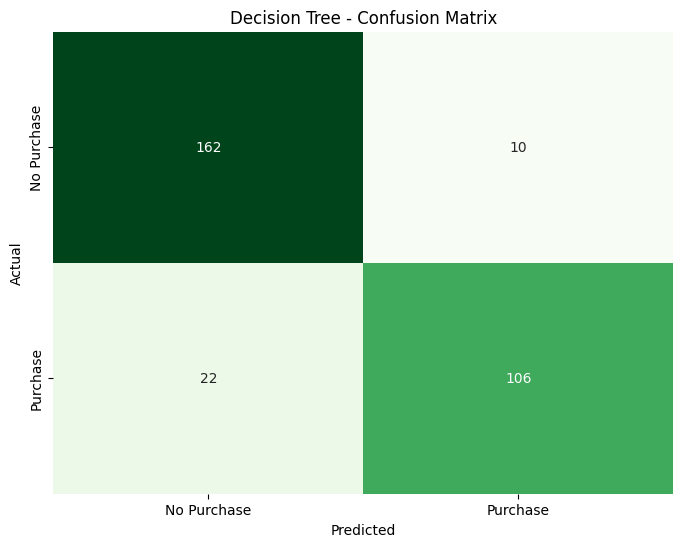

In [9]:
# 2. Decision Tree Model
print("\n" + "="*60)
print("DECISION TREE MODEL")
print("="*60)

# Initialize and train decision tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)

# Make predictions
dt_y_pred_train = dt_model.predict(X_train)
dt_y_pred_test = dt_model.predict(X_test)

# Calculate evaluation metrics
dt_train_accuracy = accuracy_score(y_train, dt_y_pred_train)
dt_test_accuracy = accuracy_score(y_test, dt_y_pred_test)
dt_precision = precision_score(y_test, dt_y_pred_test)
dt_recall = recall_score(y_test, dt_y_pred_test)
dt_f1 = f1_score(y_test, dt_y_pred_test)

print(f"\nDecision Tree - Training Accuracy: {dt_train_accuracy:.4f}")
print(f"Decision Tree - Testing Accuracy: {dt_test_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")

print("\nConfusion Matrix (Decision Tree):")
dt_cm = confusion_matrix(y_test, dt_y_pred_test)
print(dt_cm)

print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, dt_y_pred_test))

# Visualize confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'])
plt.title('Decision Tree - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Model Comparison and Evaluation


MODEL COMPARISON SUMMARY

Metrics Comparison:
              Model  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score
Logistic Regression        0.815833       0.836667   0.876190 0.718750  0.789700
      Decision Tree        0.995833       0.893333   0.913793 0.828125  0.868852

************************************************************
BEST MODEL: Decision Tree
Test Accuracy: 0.8933
************************************************************


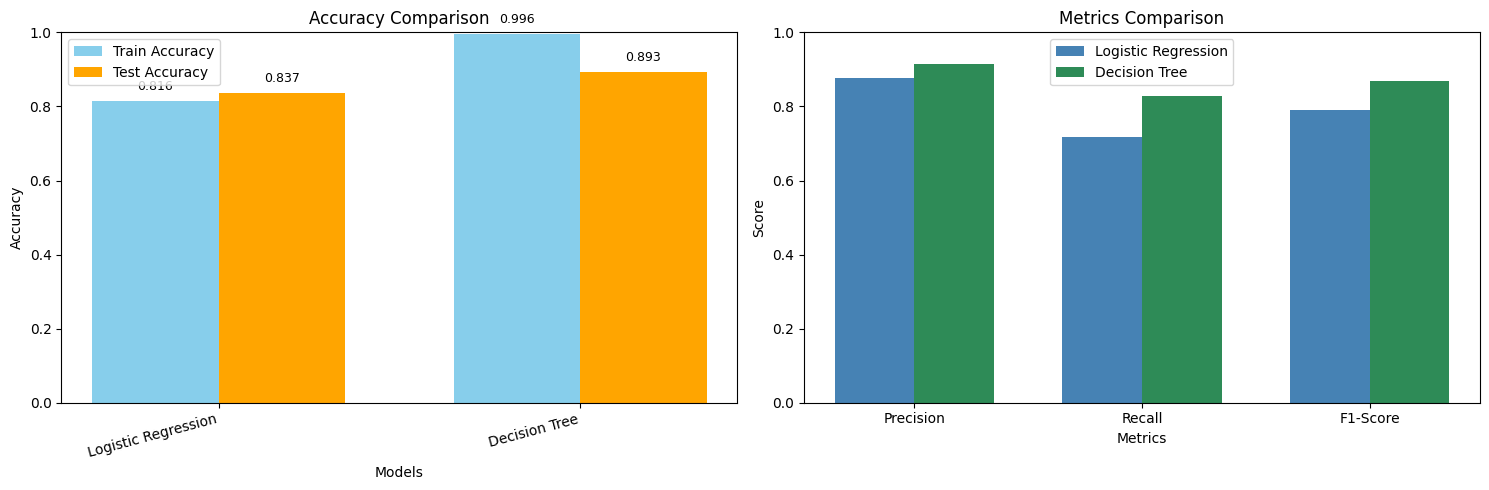

In [10]:
# Compare both models
print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Train Accuracy': [lr_train_accuracy, dt_train_accuracy],
    'Test Accuracy': [lr_test_accuracy, dt_test_accuracy],
    'Precision': [lr_precision, dt_precision],
    'Recall': [lr_recall, dt_recall],
    'F1-Score': [lr_f1, dt_f1]
})

print("\nMetrics Comparison:")
print(comparison_df.to_string(index=False))

# Identify best model
best_model_idx = comparison_df['Test Accuracy'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_accuracy = comparison_df.loc[best_model_idx, 'Test Accuracy']

print(f"\n{'*'*60}")
print(f"BEST MODEL: {best_model_name}")
print(f"Test Accuracy: {best_accuracy:.4f}")
print(f"{'*'*60}")

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Accuracy Comparison
ax1 = axes[0]
models = comparison_df['Model']
x_pos = np.arange(len(models))
width = 0.35
ax1.bar(x_pos - width/2, comparison_df['Train Accuracy'], width, label='Train Accuracy', color='skyblue')
ax1.bar(x_pos + width/2, comparison_df['Test Accuracy'], width, label='Test Accuracy', color='orange')
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Comparison')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models, rotation=15, ha='right')
ax1.legend()
ax1.set_ylim([0, 1])
for i, v in enumerate(comparison_df['Train Accuracy']):
    ax1.text(i - width/2, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)
for i, v in enumerate(comparison_df['Test Accuracy']):
    ax1.text(i + width/2, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Metrics Comparison
ax2 = axes[1]
metrics = ['Precision', 'Recall', 'F1-Score']
x_pos = np.arange(len(metrics))
width = 0.35
ax2.bar(x_pos - width/2, [lr_precision, lr_recall, lr_f1], width, label='Logistic Regression', color='steelblue')
ax2.bar(x_pos + width/2, [dt_precision, dt_recall, dt_f1], width, label='Decision Tree', color='seagreen')
ax2.set_xlabel('Metrics')
ax2.set_ylabel('Score')
ax2.set_title('Metrics Comparison')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(metrics)
ax2.legend()
ax2.set_ylim([0, 1])

plt.tight_layout()
plt.show()

## Project Insights and Conclusions

### Key Findings:
1. **Data Quality**: The dataset had no missing values, making it suitable for model training.
2. **Class Balance**: Analyzed the distribution of purchase status to understand class imbalance.
3. **Feature Importance**: Key features like Annual Income, Number of Purchases, and Time Spent on Website showed strong correlation with purchase behavior.
4. **Model Performance**: Compared Logistic Regression and Decision Tree models based on Accuracy, Precision, Recall, and F1-Score.

### Model Recommendations:
- **Logistic Regression**: Good baseline model, provides probability estimates, easy to interpret.
- **Decision Tree**: Can capture non-linear relationships, useful for feature importance analysis.
- Choose based on business requirements: Accuracy vs. Interpretability.

### Future Improvements:
- Implement ensemble methods (Random Forest, Gradient Boosting)
- Perform hyperparameter tuning using GridSearchCV/RandomizedSearchCV
- Try K-Nearest Neighbors and other algorithms
- Feature engineering for better predictions
- Handle class imbalance if present using techniques like SMOTE
- Cross-validation for more robust evaluation